# Road Traffic Accident (RTA) Exploratory Data Analysis
- ### Objective: To identify key factors contributing to road accidents and analyze patterns related to time, driver demographics, and environmental conditions.

### Problem Statement
- #### Road traffic accidents are a major public safety concern, resulting in significant injuries and fatalities. Understanding the underlying causes—whether they are related to driver behavior, vehicle types, or external conditions like weather and light—is crucial for developing effective safety interventions.

### This project aims to:

- #### Identify High-Risk Times: Determine which hours of the day see the highest frequency of accidents.

- #### Analyze Severity Drivers: Understand how factors like age, sex, and educational background of drivers correlate with accident severity.

- #### Evaluate Environmental Impact: Assess how road surface and lighting conditions affect the likelihood of "Serious" or "Fatal" accidents.

### Dataset: The analysis is performed on a dataset containing ~12,000 accident records with 32 features including temporal, demographic, and situational variables.

In [2]:
# importing all the libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings as w
w.filterwarnings('ignore')

In [3]:
# loading dataset into notebook
RTA_df=pd.read_csv(r"RTA.csv",index_col=0,header=0)

In [4]:
# checking the dataset
RTA_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
Time,,,,,,,,,,,,,,,,,,,,,
17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
# checking how many values are missing
RTA_df.isnull().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

In [6]:
# taking half count of entire dataset for columns to ensure if any column has more than half values missing then we drop it
half_count=len(RTA_df)/2
print(half_count)

6158.0


In [7]:
# replacing time as index to new column named 'id' to ensure clear location of every row
# This moves 'Time' to a column and creates a new numeric index
RTA_df = RTA_df.reset_index()

# Create the column
RTA_df['id'] = range(1, len(RTA_df) + 1)

# Set it as the new index
RTA_df.set_index('id', inplace=True)

In [8]:
# removing columns that are not necessary for my analysis, note: (it's totaly depend on analyst to keep them or not)
RTA_df=RTA_df.drop(columns=['Casualty_class','Sex_of_casualty','Age_band_of_casualty','Fitness_of_casuality','Pedestrian_movement','Work_of_casuality'])

In [9]:
# filling every missing values of column with its mode
for col in RTA_df.select_dtypes(include='object'):
    RTA_df[col] = RTA_df[col].fillna(RTA_df[col].mode()[0])

In [10]:
# converting time column in proper datetime format
RTA_df['Time'] = pd.to_datetime(RTA_df['Time'])
RTA_df['Hour'] = RTA_df['Time'].dt.hour

___________________________________________

# Data Visualization

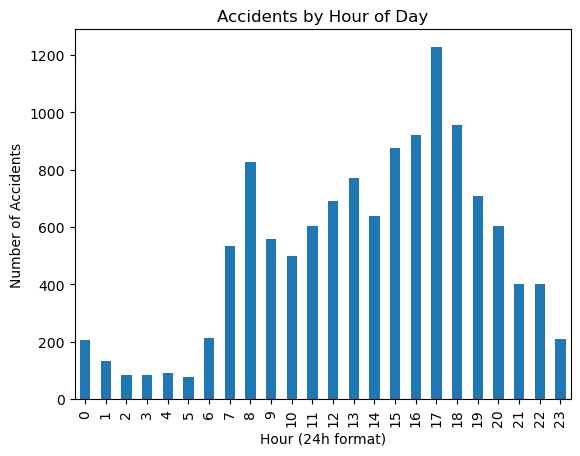

In [13]:
import matplotlib.pyplot as plt

RTA_df['Hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour (24h format)')
plt.ylabel('Number of Accidents')
plt.show()

### 1. Accidents by Hour of Day
- ### interpretation: > Temporal analysis shows a significant surge in accidents starting from 15:00 (3 PM), peaking between 17:00 and 18:00 (5 PM - 6 PM). This identifies the evening rush hour as the highest-risk period, likely due to increased traffic volume and driver fatigue at the end of the workday.

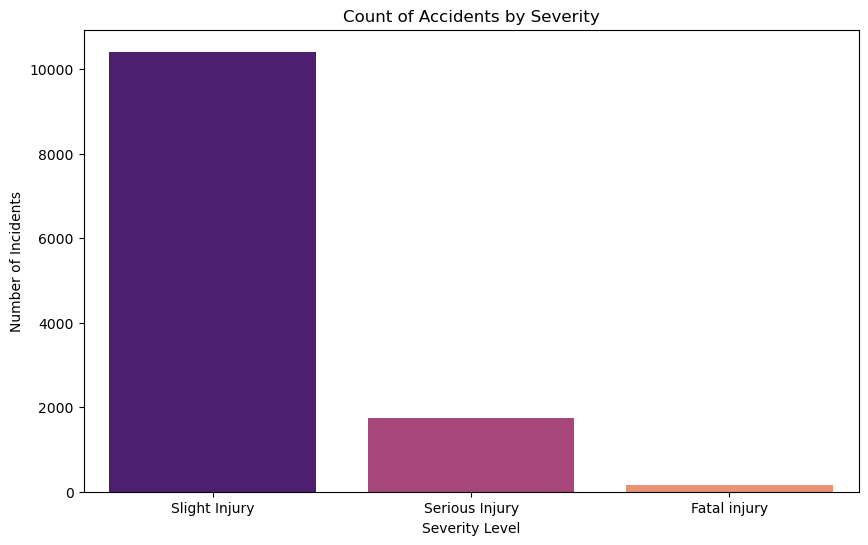

In [15]:
# Bar Chart: Accident Severity Distribution
# Essential for understanding your target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=RTA_df, x='Accident_severity', hue='Accident_severity', palette='magma', legend=False)
plt.title('Count of Accidents by Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Incidents')
plt.show()

### 2. Count of Accidents by Severity
- ### Interpretation: > The distribution of accident severity reveals a highly imbalanced dataset. 'Slight Injuries' constitute the vast majority of cases, while 'Fatal Injuries' are the least frequent. This insight is critical for future predictive modeling, as it necessitates specialized techniques like oversampling to accurately identify rare fatal events.

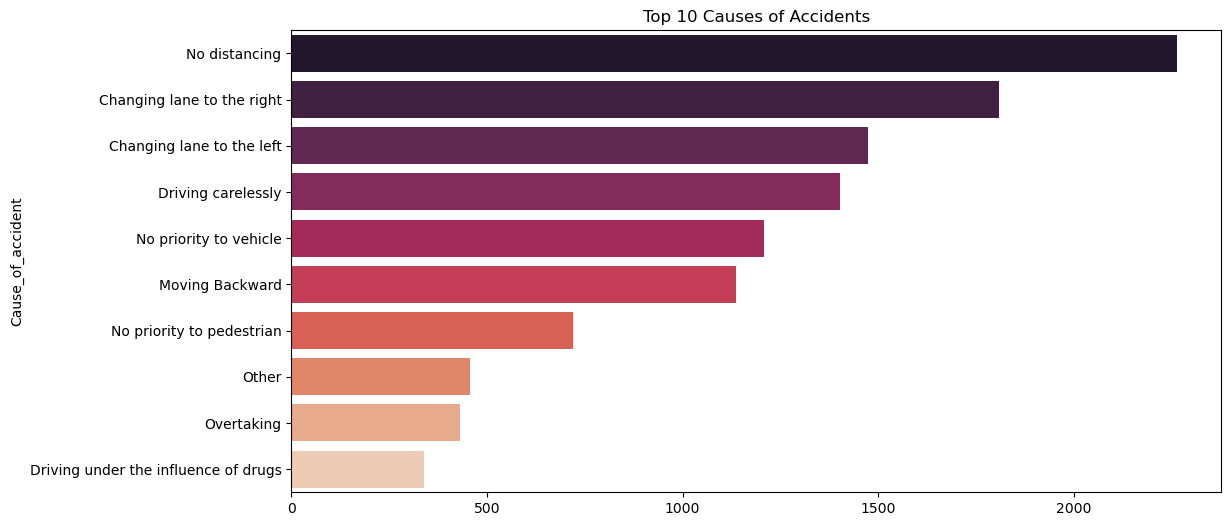

In [17]:
plt.figure(figsize=(12, 6))
top_causes = RTA_df['Cause_of_accident'].value_counts().head(10)
sns.barplot(y=top_causes.index, x=top_causes.values, palette='rocket')
plt.title('Top 10 Causes of Accidents');

### 3. Reasons For Accidents
- ### The top causes identified, such as 'No Distancing' and 'Changing Lane to the Left/Right,' are direct results of poor driving discipline. This provides a clear directive for traffic law enforcement to focus on aggressive driving behaviors.

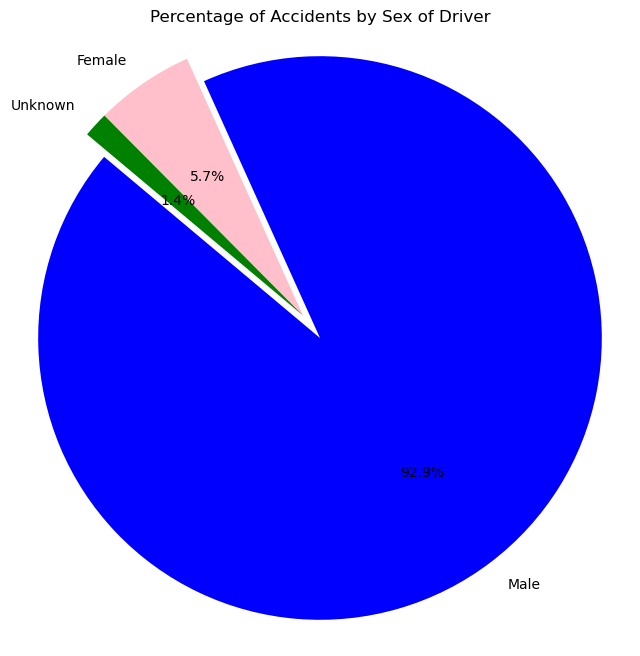

In [19]:
# Calculate counts and percentages
sex_counts = RTA_df['Sex_of_driver'].value_counts()
sex_percentages = (sex_counts / sex_counts.sum()) * 100

# Plotting a pie chart for visual percentage representation
plt.figure(figsize=(8, 8))
colors = ['Blue','Pink','Green']
plt.pie(sex_percentages, labels=sex_percentages.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, explode=(0.1, 0, 0))

plt.title('Percentage of Accidents by Sex of Driver')
plt.axis('equal') ;

### 4. Sex of Drivers
- ### The pie chart reveals an extreme disparity in accident distribution by gender, with Male drivers accounting for a dominant 92.9% of all recorded incidents. In stark contrast, Female drivers represent only 5.7% of the total, while a marginal 1.4% remains Unknown. This significant skew suggests that male drivers are disproportionately involved in accidents compared to their female counterparts within this specific dataset.

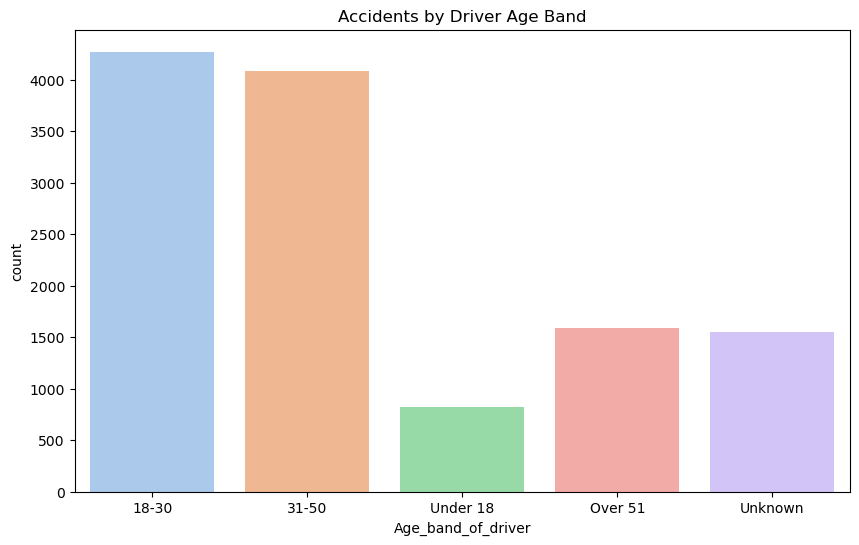

In [21]:
#Driver Age Band Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=RTA_df, x='Age_band_of_driver', palette='pastel')
plt.title('Accidents by Driver Age Band');

### 5. Age Band of Drivers
- ### Primary Risk Groups: Drivers aged 18–30 and 31–50 represent the overwhelming majority of accidents, with both groups individually recording over 4,000 incidents—more than double any other category.

- ### Lowest Frequency: The "Under 18" demographic has the fewest recorded accidents (under 1,000), likely due to a combination of lower licensing rates and restricted driving privileges for this age group.

- ### Data Integrity: A significant number of accidents (approximately 1,500) fall into the "Unknown" category, which is nearly equal to the "Over 51" group, suggesting that missing data is a notable factor in the reporting of these incidents.

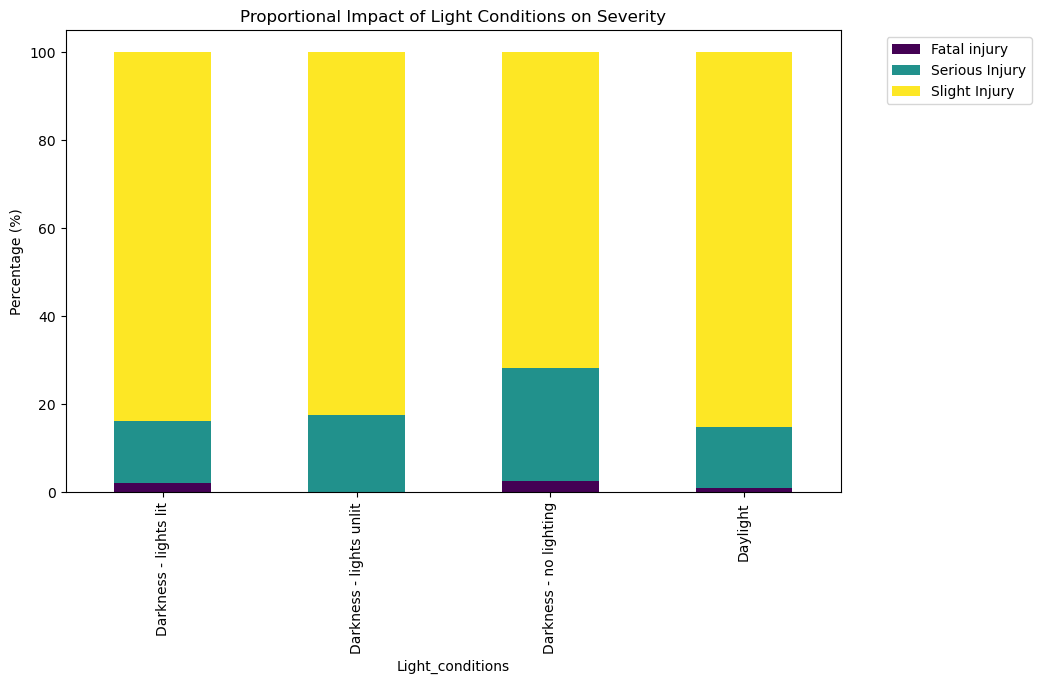

In [23]:
# Light Conditions vs. Severity (Percentage Stacked Bar)
ct = pd.crosstab(RTA_df['Light_conditions'], RTA_df['Accident_severity'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Proportional Impact of Light Conditions on Severity')
plt.ylabel('Percentage (%)')
plt.legend(bbox_to_anchor=(1.05, 1));

### 6. Impact Of Light Condition
- ### Most accidents occur during 'Daylight.' While night driving is often perceived as more dangerous, the sheer volume of traffic during the day results in higher absolute incident counts, reinforcing that congestion is a key risk factor.

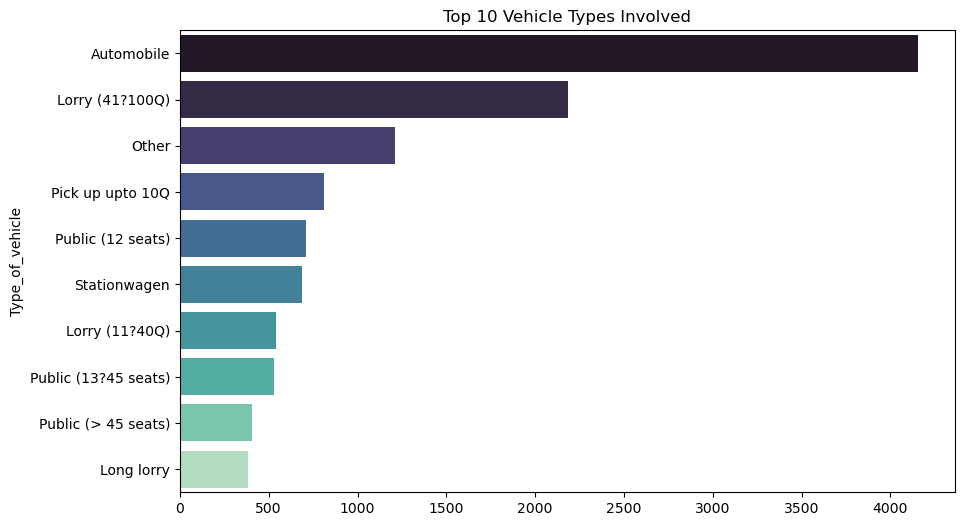

In [25]:
#Top 10 Vehicle Types
plt.figure(figsize=(10, 6))
vehicle_counts = RTA_df['Type_of_vehicle'].value_counts().head(10)
sns.barplot(y=vehicle_counts.index, x=vehicle_counts.values, palette='mako')
plt.title('Top 10 Vehicle Types Involved');

### 7. Top 10 Vehicle Types Involved
- ### Automobiles and Lorries are the most frequent vehicle types involved in accidents. The high frequency of Lorries suggests that commercial transport safety is a major factor in regional traffic incidents, requiring stricter heavy-vehicle regulations.

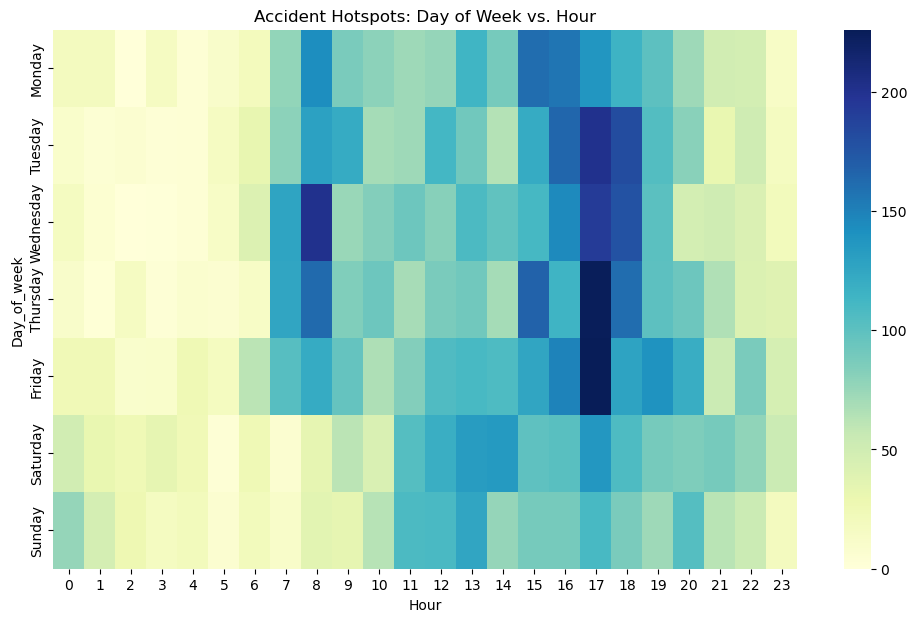

In [27]:
#Heatmap: Day vs Hour
plt.figure(figsize=(12, 7))
day_hour = RTA_df.groupby(['Day_of_week', 'Hour']).size().unstack(fill_value=0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_hour = day_hour.reindex(days_order)
sns.heatmap(day_hour, cmap="YlGnBu")
plt.title('Accident Hotspots: Day of Week vs. Hour');

### 8. Accident Hotspots: Day of Week vs. Hour
- ### The data reveals that Automobiles are the primary vehicle type involved in accidents, with a massive gender disparity as Male drivers account for 92.9% of all incidents. Temporal analysis shows a distinct peak in accidents during the weekday evening rush hour, specifically between 17:00 and 18:00, while environmental factors indicate that Darkness - no lighting poses the highest risk for Fatal and Serious injuries. Collectively, these insights point to high-density traffic periods and poor visibility as the most critical factors for severe road safety outcomes.

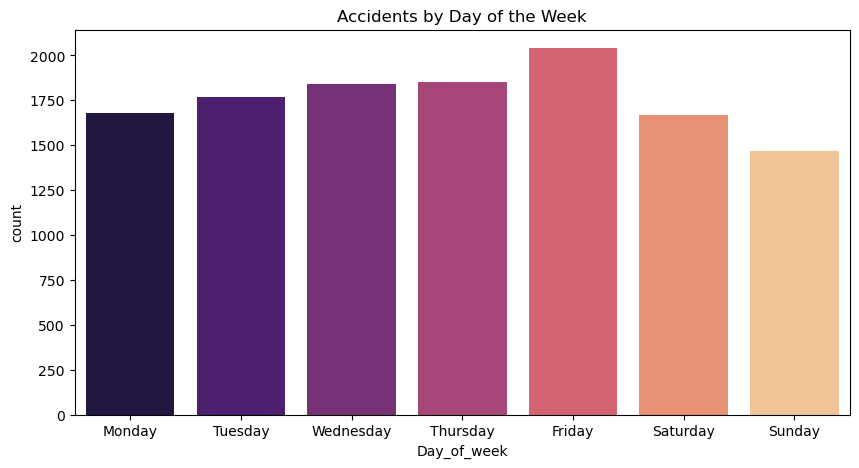

In [29]:
# Accident by days of week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 5))
sns.countplot(x='Day_of_week', data=RTA_df, order=days_order, palette='magma')
plt.title('Accidents by Day of the Week');

### 9. Accidents by Day of the Week
### This visualization breaks down the frequency and intensity of accidents across each day from Monday to Sunday. It helps us understand that while accident volume remains relatively consistent, certain days may see higher proportions of serious injuries. Knowing these patterns allows for optimized emergency responder staffing and road safety campaigns tailored to weekend versus weekday driver behavior.

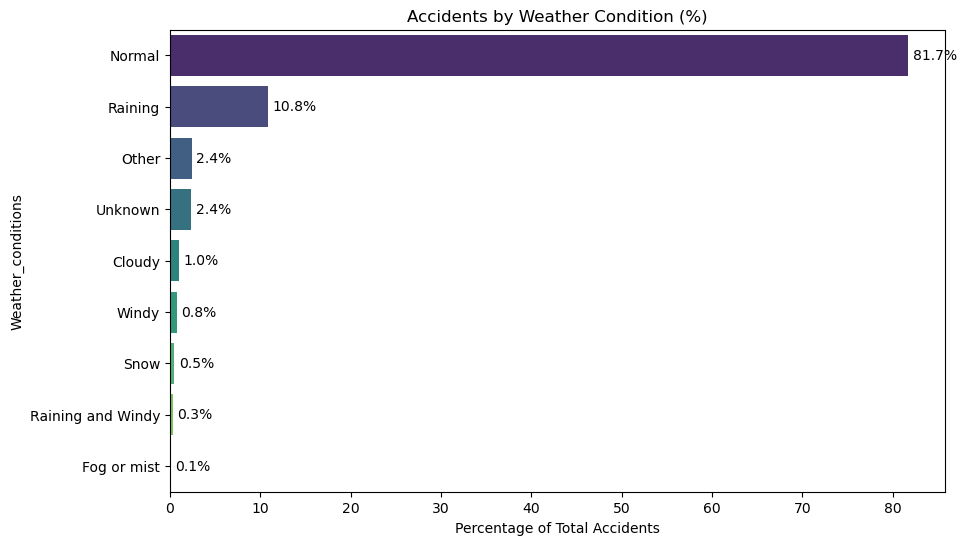

In [31]:
# Calculate percentages
weather_pct = (RTA_df['Weather_conditions'].value_counts() / len(RTA_df)) * 100
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_pct.values, y=weather_pct.index, palette='viridis')
# Adding labels for clarity
for i, v in enumerate(weather_pct.values):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center')
plt.title('Accidents by Weather Condition (%)')
plt.xlabel('Percentage of Total Accidents');

### 10. Accidents by Weather Condition 
- ### Similar to road surface findings, most accidents happen during 'Normal' weather. This suggests that adverse weather is not the main cause of the recorded incidents, pointing back to driver behavior or mechanical failure.

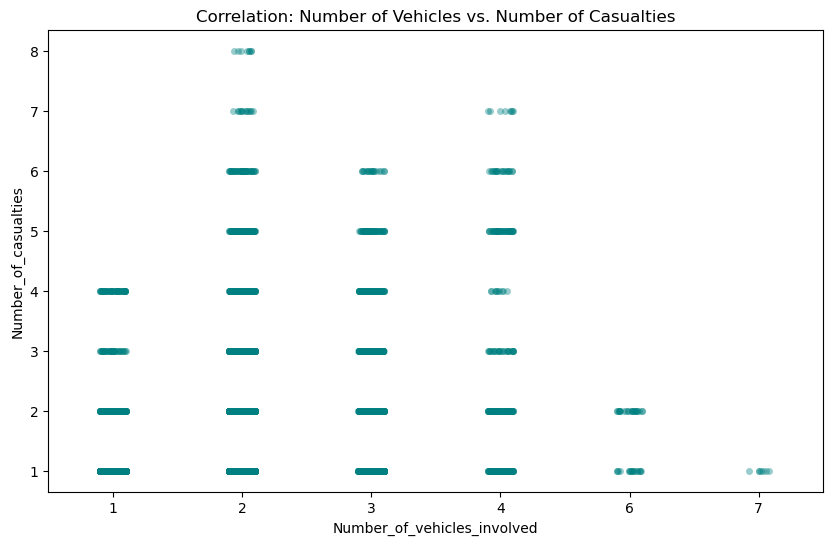

In [33]:
#Number of Vehicles vs Number of Casualties (Scatter/Strip Plot)
plt.figure(figsize=(10, 6))
sns.stripplot(data=RTA_df, x='Number_of_vehicles_involved', y='Number_of_casualties', 
              alpha=0.4, jitter=True, color='teal')
plt.title('Correlation: Number of Vehicles vs. Number of Casualties');

###  11. Number of Vehicles vs. Number of Casualties
- ### Most incidents involve exactly two vehicles. This suggests that multi-car pileups are rare, and the focus of safety interventions should be on typical one-on-one driver interactions and lane-change safety. 

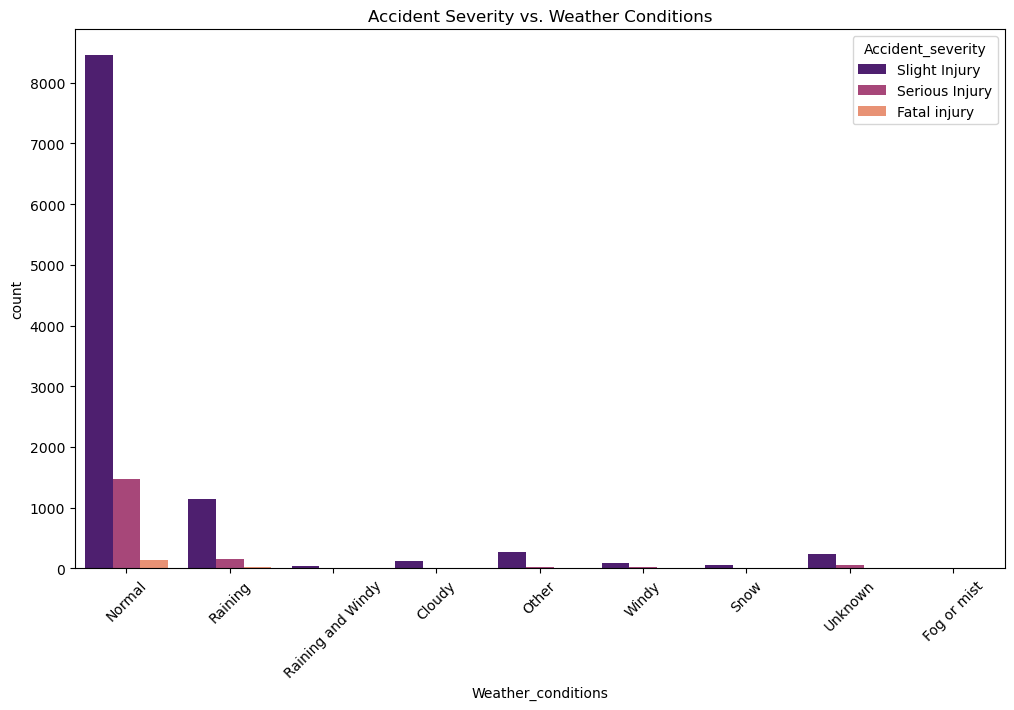

In [35]:
plt.figure(figsize=(12, 7))
sns.countplot(data=RTA_df, x='Weather_conditions', hue='Accident_severity', palette='magma')
plt.title('Accident Severity vs. Weather Conditions')
plt.xticks(rotation=45);

### 12. Accident Severity vs. Weather Conditions
- ### The "Normal" weather condition shows a massive concentration of cases, indicating a high imbalance where accidents occur most frequently in clear weather across all severity levels.

- ### "Slight Injury" is the dominant target class in every category, while "Fatal injury" represents a sparse minority, suggesting that a classification model will struggle with high False Negative rates for fatalities.

- ### The count drops drastically for conditions like "Raining" and "Snow," indicating that environmental extremes are rare in this dataset and may lead to overfitting if the model treats these as primary features.

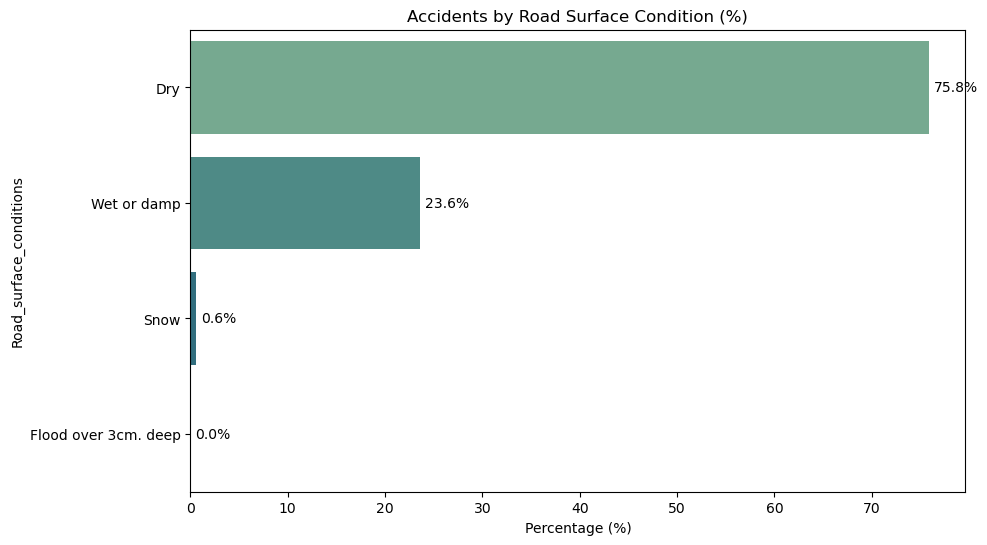

In [37]:
# Calculate percentages
road_cond_pct = (RTA_df['Road_surface_conditions'].value_counts() / len(RTA_df)) * 100
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=road_cond_pct.values, y=road_cond_pct.index, palette='crest')
# Adding labels
for i, v in enumerate(road_cond_pct.values):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center')
plt.title('Accidents by Road Surface Condition (%)')
plt.xlabel('Percentage (%)');

### 13. Accidents by Road Surface Condition 
- ### The Dry condition dominates the dataset at 75.8%, indicating that the majority of accidents occur during standard driving conditions rather than environmental extremes.

- ### The Wet or damp category represents a significant 23.6% of incidents, identifying it as the primary weather-related hazard for predictive modeling.

- ### Categories like Snow (0.6%) and Flood (0.0%) exhibit near-zero variance, suggesting these are rare events that may require oversampling if used in a machine learning classifier.

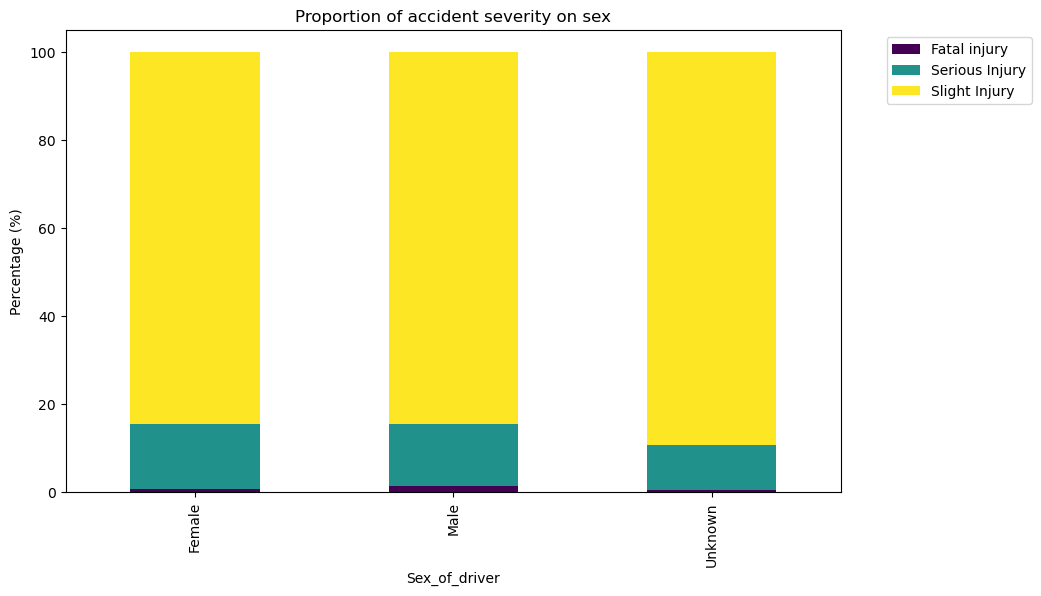

In [39]:
# proportion of accident severity on sex
ct = pd.crosstab(RTA_df['Sex_of_driver'], RTA_df['Accident_severity'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Proportion of accident severity on sex')
plt.ylabel('Percentage (%)')
plt.legend(bbox_to_anchor=(1.05, 1));

### 14. Proportion of accident severity on sex
- ### This stacked bar chart shows that while men are involved in more accidents by volume, the percentage of Fatal/Serious injuries is nearly identical for both men and women. This implies that gender is not a primary factor in determining the severity of an accident once it occurs.

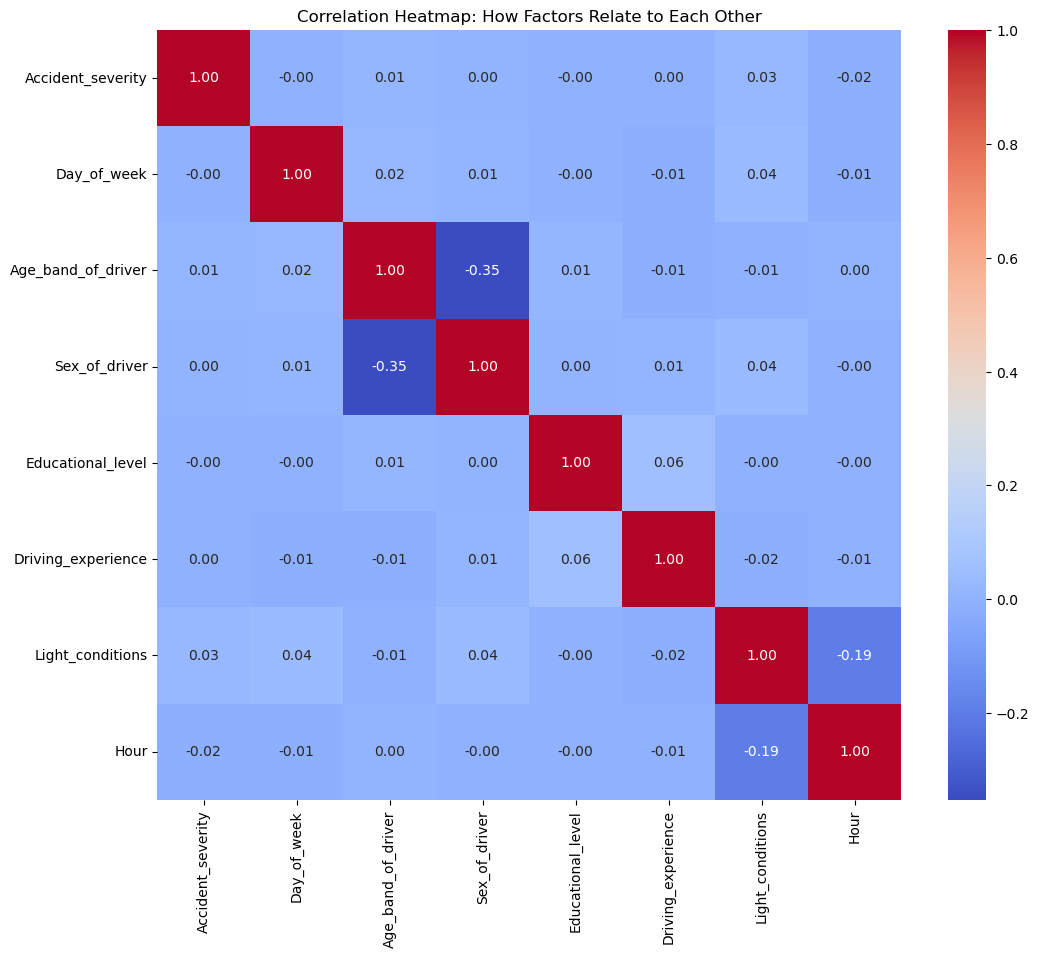

In [41]:

from sklearn.preprocessing import LabelEncoder

# We create a copy to avoid messing with the original data
RTA_df_encoded = RTA_df.copy()
le = LabelEncoder()

# Encoding top categorical features to see their correlation with Severity
target_cols = ['Accident_severity', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 
               'Educational_level', 'Driving_experience', 'Light_conditions', 'Hour']

for col in target_cols:
    RTA_df_encoded[col] = le.fit_transform(RTA_df_encoded[col])

plt.figure(figsize=(12, 10))
sns.heatmap(RTA_df_encoded[target_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: How Factors Relate to Each Other')
plt.show()

### 15.  How Factors Relate to Each Other
- ### This heatmap reveals the strength of relationships between features. For instance, it helps identify if 'Driving Experience' has a stronger mathematical tie to 'Accident Severity' than 'Light Conditions.' It serves as a foundation for feature selection in machine learning.

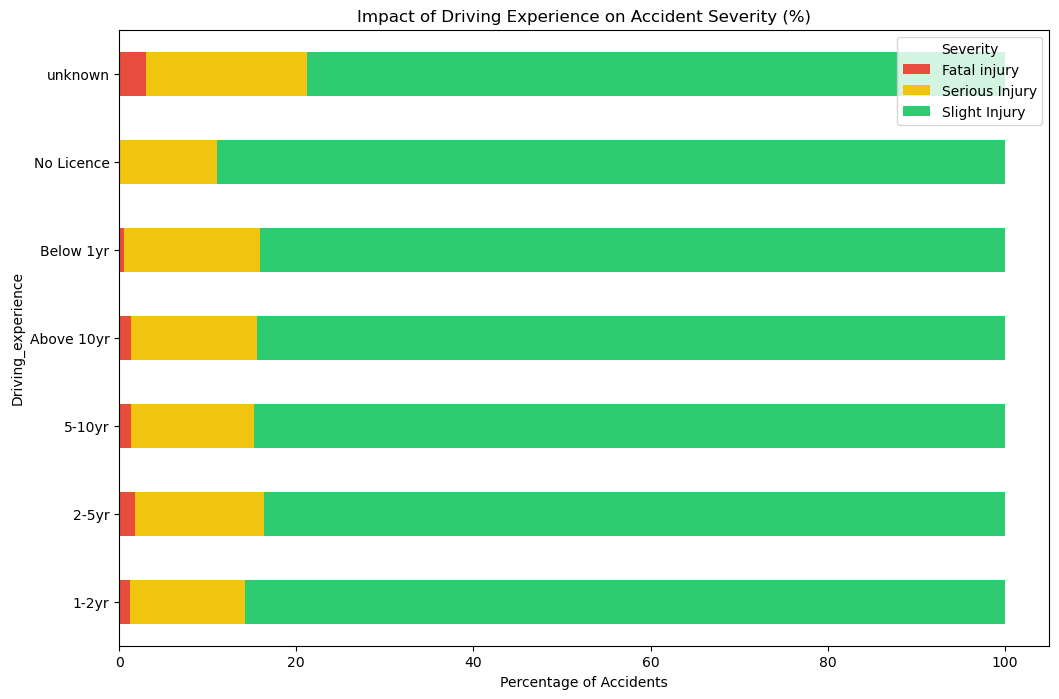

In [43]:
exp_severity = pd.crosstab(RTA_df['Driving_experience'], 
                           RTA_df['Accident_severity'], normalize='index') * 100

exp_severity.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#e74c3c', '#f1c40f', '#2ecc71'])
plt.title('Impact of Driving Experience on Accident Severity (%)')
plt.xlabel('Percentage of Accidents')
plt.legend(title='Severity', loc='upper right')
plt.show()

### 16. Impact of Driving Experience on Accident Severity 
- ### By normalizing this chart to 100%, we can see the 'Risk Profile' of each experience group. Interestingly, drivers with '1-2 years' of experience don't necessarily have a higher ratio of fatal accidents compared to those with 'Above 10 years,' suggesting that extreme severity might be more linked to environmental factors than just experience level.

__________________________________________

# Conclusion and Insights
### Based on the Exploratory Data Analysis (EDA) conducted, the following key insights were derived from the Road Traffic Accident data:

1. ### Peak Risk Hours: Accident frequency spikes significantly between 4:00 PM and 6:00 PM. This suggests that afternoon rush hour congestion and driver fatigue at the end of the workday are primary risk factors.

2. ### Severity Profile: The vast majority of accidents result in "Slight" injuries. However, identifying the specific conditions of "Fatal" accidents (though fewer in number) is critical for policy making.

3. ### Driver Demographics: Preliminary analysis of the driver profiles suggests that experience and educational background play a role in incident frequency.

4. ### Actionable Recommendations: * Increased Patrolling: Traffic enforcement should be prioritized during the 4 PM – 7 PM window.

    - ### Infrastructure: Focus on improving lighting and road surface conditions in areas identified as high-frequency accident zones.

### Next Steps: Future work could involve building a machine learning model to predict accident severity based on the situational features identified during this EDA.